<a href="https://colab.research.google.com/github/karolbialas/SLP/blob/main/Ludolfina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wstęp techniczny

Zacznijmy od krótkiej instrukcji obsługi notatnika na Google Colab, żeby wykonać kod znajdujący się w poniższych komórkach można:
- nacisnąć 'shift+enter', wtedy automatycznie przenosimy się do komórki niżej
- nacisnąć 'ctrl+enter', wtedy zostajemy w tej samej komórce
- nacisnąć przycisk Play (►) w lewym górnym rogu komórki z kodem

Poniżej przykładowa komórka z kodem, proszę ją wykonać.

In [ ]:
print('Witaj!')

Witaj!


Następnie  wykonaj poniższą komórkę, odpowiada ona za zaimportowanie potrzebnych nam bibliotek.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metoda Monte Carlo

Żeby uzyskać π na komputerze potrzebny jest nam wzór, w którym π się pojawia. Najprostszym takim wzorem jest wzór na pole koła o promieniu $r$:

$P=\pi r^2$

Zacznijmy od narysowania kwadratu o boku 1.

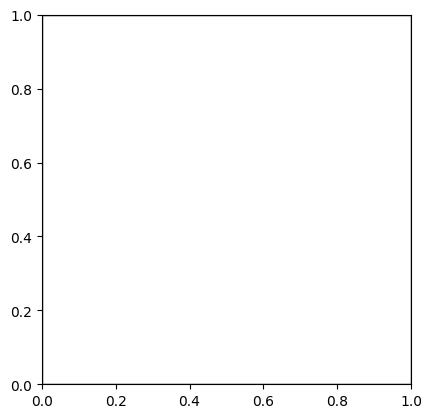

In [ ]:
plt.axes()
rectangle = plt.Rectangle((0,0), 1, 1, fc='none', ec="black")
plt.gca().add_patch(rectangle)
plt.axis('square')
plt.ylim([0,1])
plt.xlim([0,1])
plt.show()

Dodajmy ćwierć okręgu o promieniu $r=1$.

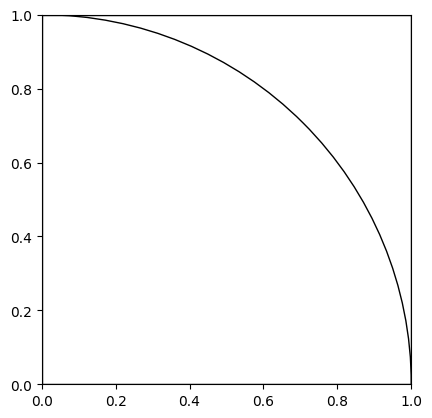

In [ ]:
plt.axes()
circle = plt.Circle((0,0),1,ec='black',fc='none')
plt.gca().add_patch(circle)
rectangle = plt.Rectangle((0,0), 1, 1, fc='none', ec="black")
plt.gca().add_patch(rectangle)
plt.axis('square')
plt.ylim([0,1])
plt.xlim([0,1])
plt.show()

Następnie generujemy losowy punkt w tym kwadracie, jeśli znajduje się kole oznaczymy go kolorem niebieskim, jeśli nie czerwonym.

Współrzędne punktu to: 0.6507901030263538 0.21018863363697038
Punkt jest w okręgu.


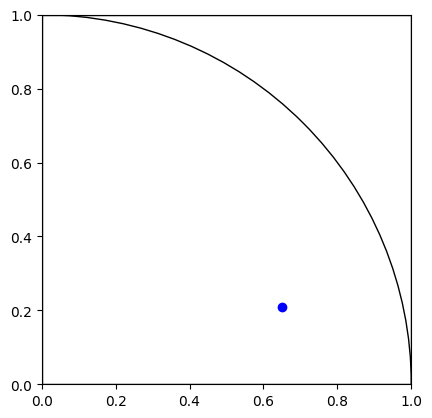

In [ ]:
figure=plt.figure()
plt.axes()
circle = plt.Circle((0,0),1,ec='black',fc='none')
plt.gca().add_patch(circle)
rectangle = plt.Rectangle((0,0), 1, 1, fc='none', ec="black")
plt.gca().add_patch(rectangle)
plt.axis('square')
plt.ylim([0,1])
plt.xlim([0,1])
punkty=[]
punkt = [np.random.random(), np.random.random()]
print('Współrzędne punktu to:',punkt[0],punkt[1])
if punkt[0]**2+punkt[1]**2<1.:
  print('Punkt jest w okręgu.')
  kolor='blue'
else:
  print('Punkt nie jest w okręgu.')
  kolor='red'
plt.scatter(punkt[0],punkt[1],color=kolor)
plt.show()

Wygenerujmy teraz 100 takich punktów

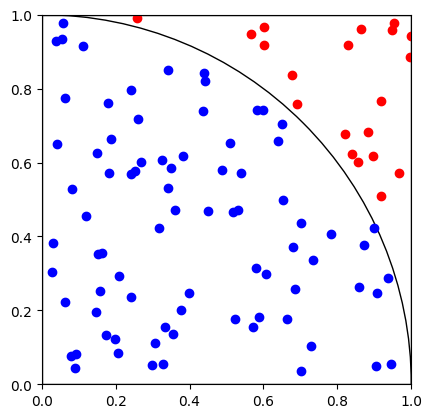

In [ ]:
figure=plt.figure()
plt.axes()
circle = plt.Circle((0,0),1,ec='black',fc='none')
plt.gca().add_patch(circle)
rectangle = plt.Rectangle((0,0), 1, 1, fc='none', ec="black")
plt.gca().add_patch(rectangle)
plt.axis('square')
plt.ylim([0,1])
plt.xlim([0,1])
punkty_w_x = []
N=100 #tu można zmienić liczbę punktów
punkty_w_y = []
punkty_poza_x = []
punkty_poza_y = []
punkt = [np.random.random(), np.random.random()]
for i in range(N):
  x=np.random.random()
  y=np.random.random()
  if x**2+y**2<1:
    punkty_w_x.append(x)
    punkty_w_y.append(y)
  else:
    punkty_poza_x.append(x)
    punkty_poza_y.append(y)
plt.scatter(punkty_w_x, punkty_w_y,color='blue')
plt.scatter(punkty_poza_x, punkty_poza_y, color='red')
plt.show()

Część punktów wewnątrz ćwiartki koła proporcjonalna jest do jej pola:

$\frac{\text{Pole ćwiartki koła}}{\text{Pole kwadratu}}=\frac{\text{Liczba punktów w okręgu}}{\text{Liczba wszystkich punktów}}$

Pole kwadratu to $P=1\cdot1=1$, a pole ćwiartki koła to $P=\frac{1}{4}\pi 1^2=\frac{\pi}{4}$.

Przekształcająć dostajemy:
$\pi=\frac{4\cdot\text{Liczba punktów w okręgu}}{\text{Liczba wszystkich punktów}}$


In [ ]:
print("Liczba Pi wyliczona z punktów z obrazka wyżej wynosi: ", 4*len(punkty_w_x)/N)

Liczba Pi wyliczona z punktów z obrazka wyżej wynosi:  3.2


Jak widać otrzymana wartość różni się (albo i nie) od znanego $\pi\approx 3.14$.

Poniżej, zmieniając liczbę punktów możecie zobaczyć z jaką dokładnością zostanie wyliczone $\pi$

In [ ]:
def MonteCarlo(N):
  """Funkcja licząca liczbę Pi metodą Monte Carlo,
  argument N oznacza liczbę punktów w obliczeniach"""
  count=0
  for i in range(N):
    if np.random.random()**2+np.random.random()**2<1:
      count+=1
  return 4*count/N

#Tu możecie zmienić liczbę punktów
N=10

print('Pi wyliczone z {} punktów wynosi {}.'.format(N, MonteCarlo(N)))

Pi wyliczone z 10 punktów wynosi 3.6.


Dokładność zależy do liczby punktów, poniżej pokazano jak może się zmieniać z N

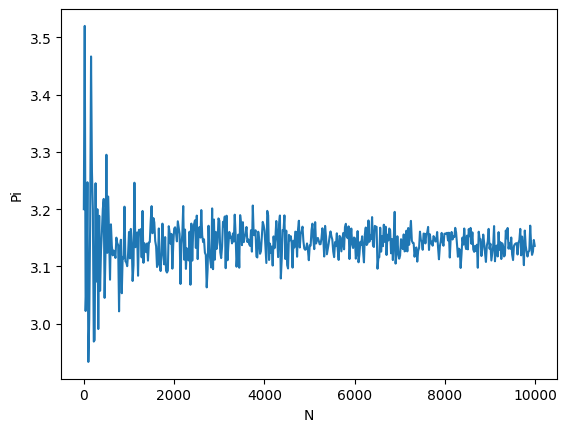

In [ ]:
x = []
y = []
for i in range(5,10000,20):
  x.append(i)
  y.append(MonteCarlo(i))

plt.plot(x,y)
plt.xlabel('N')
plt.ylabel('Pi')
plt.show()

# Metoda Gaussa-Legendre'a

In [12]:
from __future__ import with_statement
import decimal

def pi_gauss_legendre():
    D = decimal.Decimal
    with decimal.localcontext() as ctx:
        ctx.prec += 2
        a, b, t, p = 1, 1/D(2).sqrt(), 1/D(4), 1
        pi = None
        while 1:
            an    = (a + b) / 2
            b     = (a * b).sqrt()
            t    -= p * (a - an) * (a - an)
            a, p  = an, 2*p
            piold = pi
            pi    = (a + b) * (a + b) / (4 * t)
            if pi == piold:  # equal within given precision
                break
    return +pi

decimal.getcontext().prec = 5000
print(pi_gauss_legendre())

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

# Algorytm Chudnovskiego

In [11]:
#Note: For extreme calculations, other code can be used to run on a GPU, which is much faster than this.
import decimal


def binary_split(a, b):
    if b == a + 1:
        Pab = -(6*a - 5)*(2*a - 1)*(6*a - 1)
        Qab = 10939058860032000 * a**3
        Rab = Pab * (545140134*a + 13591409)
    else:
        m = (a + b) // 2
        Pam, Qam, Ram = binary_split(a, m)
        Pmb, Qmb, Rmb = binary_split(m, b)

        Pab = Pam * Pmb
        Qab = Qam * Qmb
        Rab = Qmb * Ram + Pam * Rmb
    return Pab, Qab, Rab


def chudnovsky(n):
    """Chudnovsky algorithm."""
    P1n, Q1n, R1n = binary_split(1, n)
    return (426880 * decimal.Decimal(10005).sqrt() * Q1n) / (13591409*Q1n + R1n)

decimal.getcontext().prec = 100 # number of digits of decimal precision

print(f"2 = {chudnovsky(2)}")  # 3.141592653589793238462643384

for n in range(2,10):
    print(f"{n} = {chudnovsky(n)}")  # 3.14159265358979323846264338...

2 = 3.141592653589793238462643383587350688475866345996374315654905806801301450565203591105830910219290929
2 = 3.141592653589793238462643383587350688475866345996374315654905806801301450565203591105830910219290929
3 = 3.141592653589793238462643383279502884197167678854846287912727790370642977335176958726922911495373797
4 = 3.141592653589793238462643383279502884197169399375105820984947408020662452789717346364103622321101907
5 = 3.141592653589793238462643383279502884197169399375105820974944592307816346694690247717268165239156011
6 = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628395732194831867
7 = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117065
8 = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
9 = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
